In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data=pd.read_csv("/content/abalone.csv")

In [14]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [16]:
data.shape

(4177, 9)

In [17]:
data['Whole weight'].mean()

0.8287421594445774

In [18]:
data['Shucked weight'].std()

0.22196294903322014

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [20]:
data['Age'] = data['Rings'] + 1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [21]:
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [22]:
data['Sex'].replace(['M', 'F', 'I'], [0, 1, 2], inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [23]:
#statistics on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


In [24]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Age               0
dtype: int64

In [25]:
data.isna

<bound method DataFrame.isna of       Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       0   0.455     0.365   0.095        0.5140          0.2245   
1       0   0.350     0.265   0.090        0.2255          0.0995   
2       1   0.530     0.420   0.135        0.6770          0.2565   
3       0   0.440     0.365   0.125        0.5160          0.2155   
4       2   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    1   0.565     0.450   0.165        0.8870          0.3700   
4173    0   0.590     0.440   0.135        0.9660          0.4390   
4174    0   0.600     0.475   0.205        1.1760          0.5255   
4175    1   0.625     0.485   0.150        1.0945          0.5310   
4176    0   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight   Age  
0             0.1010        0.1500  16.5  
1             0.0485        0.0700   8.5  
2         

In [26]:
data.cov()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,0.685277,-0.044614,-0.037646,-0.014471,-0.187240,-0.081018,-0.041256,-0.051342,-0.939017
Length,-0.044614,0.014422,0.011761,0.004157,0.054491,0.023935,0.011887,0.015007,0.215562
Diameter,-0.037646,0.011761,0.009849,0.003461,0.045038,0.019674,0.009787,0.012507,0.183872
Height,-0.014471,0.004157,0.003461,0.001750,0.016803,0.007195,0.003660,0.004759,0.075179
Whole weight,-0.187240,0.054491,0.045038,0.016803,0.240481,0.105518,0.051946,0.065216,0.854409
Shucked weight,-0.081018,0.023935,0.019674,0.007195,0.105518,0.049268,0.022675,0.027271,0.301204
Viscera weight,-0.041256,0.011887,0.009787,0.003660,0.051946,0.022675,0.012015,0.013850,0.178057
Shell weight,-0.051342,0.015007,0.012507,0.004759,0.065216,0.027271,0.013850,0.019377,0.281663
Age,-0.939017,0.215562,0.183872,0.075179,0.854409,0.301204,0.178057,0.281663,10.395266


In [27]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,1.000000,-0.448765,-0.458245,-0.417928,-0.461238,-0.440927,-0.454658,-0.445549,-0.351822
Length,-0.448765,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.458245,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.417928,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.461238,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.440927,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.454658,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.445549,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Age,-0.351822,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


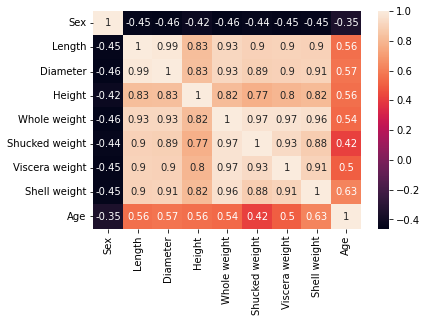

In [28]:
sns.heatmap(data.corr(),annot=True)

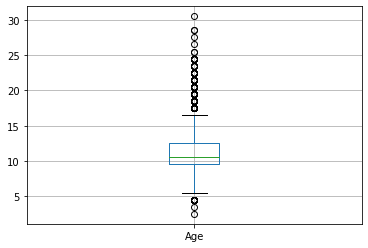

In [29]:
#uni-varient
data.boxplot(column = 'Age')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


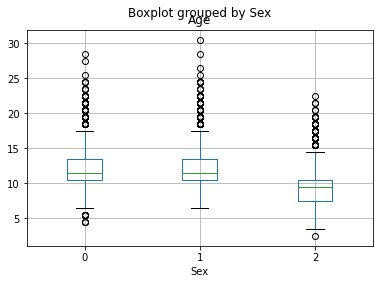

In [30]:
#bi-varient
data.boxplot(column = 'Age', by = "Sex")

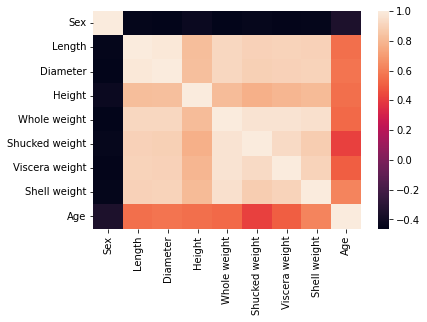

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

Text(0, 0.5, 'Count')

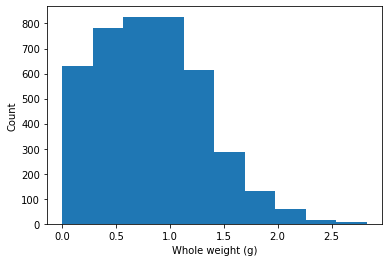

In [32]:
plt.hist(data['Whole weight'])
plt.xlabel("Whole weight (g)")
plt.ylabel("Count")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


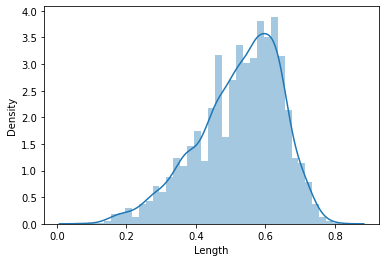

In [33]:
sns.distplot(data['Length'])

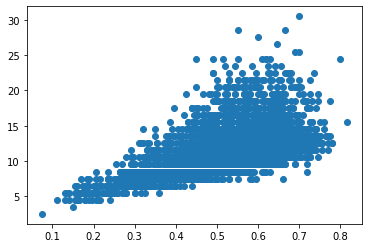

In [34]:
x1 = data['Length']
y1 = data['Age']
plt.scatter(x1, y1)

In [35]:
import statsmodels.api as sm
modl1 = sm.OLS(y1, x1).fit()
modl1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Age   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                          7.120e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:12:23   Log-Likelihood:                         -10222.
No. Observations:                4177   AIC:                                  2.045e+04
Df Residuals:                    4176   BIC:                                  2.045e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length        21.4774      0.080    266.824      0.000      21.320      21.635
==============================================================================
Omnibus:                      952.779   Durbin-Watson:                   0.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2237.504
Skew:                           1.270   Prob(JB):                         0.00
Kurtosis:                       5.532   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from sklearn.model_selection import train_test_split 
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size = 0.25) 
x_train1 = x_train1.values.reshape(-1,1)
x_train1

array([[0.45 ],
       [0.63 ],
       [0.635],
       ...,
       [0.535],
       [0.43 ],
       [0.595]])

In [37]:
y_train1.head()

2564     7.5
3586    12.5
2998    10.5
42       6.5
3718     8.5
Name: Age, dtype: float64

In [38]:
from sklearn import linear_model as lm
model1 = lm.LinearRegression()
results1 = model1.fit(x_train1, y_train1)
x_test1 = x_test1.values.reshape(-1,1)
accuracy1 = model1.score(x_train1, y_train1)
accuracy1

0.31120330549968445

In [39]:
pred1 = model1.predict(x_test1)
pred1

array([11.97998516, 12.94781096, 12.87336282, ..., 11.0866075 ,
        9.15095591, 10.19322984])

In [40]:
y_test1.head(10)

3891    13.5
2848    10.5
3310    14.5
687     17.5
379     13.5
1132    10.5
571     15.5
3240    16.5
2000    10.5
1375    11.5
Name: Age, dtype: float64

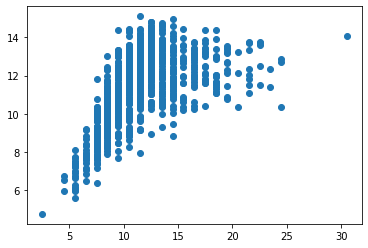

In [41]:
import matplotlib.pyplot as plt
plt.scatter(y_test1, pred1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


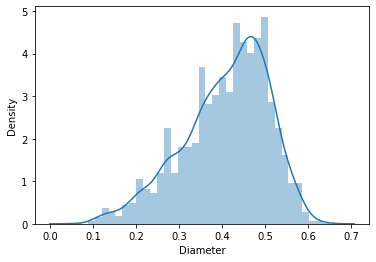

In [42]:
sns.distplot(data['Diameter'])

In [43]:
x2 = data['Diameter']
y2 = data['Age']
import statsmodels.api as sm
modl2 = sm.OLS(y2, x2).fit()
modl2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Age   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.945
Method:                 Least Squares   F-statistic:                          7.162e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:15:25   Log-Likelihood:                         -10210.
No. Observations:                4177   AIC:                                  2.042e+04
Df Residuals:                    4176   BIC:                                  2.043e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Diameter      27.5088      0.103    267.613      0.000      27.307      27.710
==============================================================================
Omnibus:                      857.998   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1874.346
Skew:                           1.179   Prob(JB):                         0.00
Kurtosis:                       5.283   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size = 0.25)
x_train2 = x_train2.values.reshape(-1,1)
model2 = lm.LinearRegression()
results2 = model2.fit(x_train2, y_train2)
accuracy2 = model2.score(x_train2, y_train2)
print("Accuracy : ", accuracy2*100)

Accuracy :  32.99992410163593


In [45]:
x_test2 = x_test2.values.reshape(-1,1)
pred2 = model2.predict(x_test2)
pred2

array([11.03598975, 10.37389896,  9.04971737, ...,  9.14430177,
       12.73850894, 12.07641814])

In [46]:
y_test2.head()

787     13.5
932      8.5
3324    13.5
1024    11.5
2305    24.5
Name: Age, dtype: float64

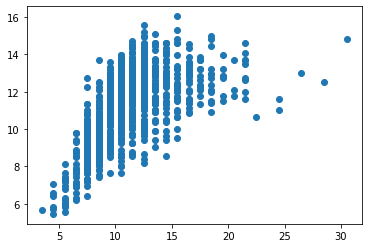

In [47]:
plt.scatter(y_test2, pred2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


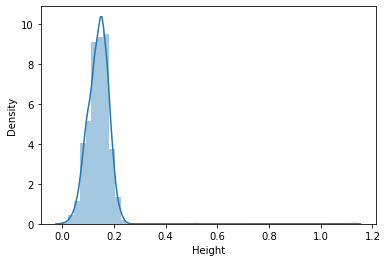

In [48]:
sns.distplot(data['Height'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


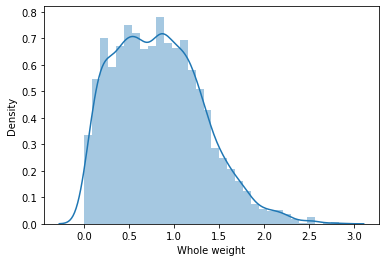

In [49]:
sns.distplot(data['Whole weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


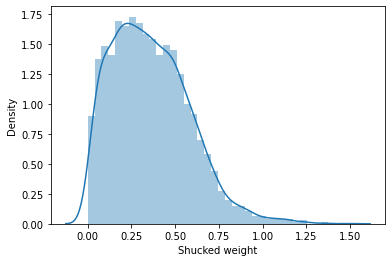

In [50]:
sns.distplot(data['Shucked weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


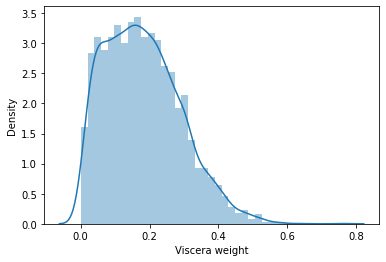

In [51]:
sns.distplot(data['Viscera weight'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


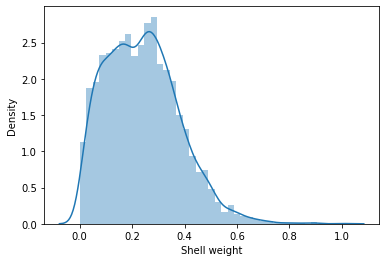

In [52]:
sns.distplot(data['Shell weight'])

In [53]:
X = data.iloc[:,0:7].values
X

array([[0.    , 0.455 , 0.365 , ..., 0.514 , 0.2245, 0.101 ],
       [0.    , 0.35  , 0.265 , ..., 0.2255, 0.0995, 0.0485],
       [1.    , 0.53  , 0.42  , ..., 0.677 , 0.2565, 0.1415],
       ...,
       [0.    , 0.6   , 0.475 , ..., 1.176 , 0.5255, 0.2875],
       [1.    , 0.625 , 0.485 , ..., 1.0945, 0.531 , 0.261 ],
       [0.    , 0.71  , 0.555 , ..., 1.9485, 0.9455, 0.3765]])

In [54]:
y = data['Age']
y.head()

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [55]:
import statsmodels.api as sm
modl = sm.OLS(y, X).fit()
modl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    Age   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                          1.539e+04
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        06:21:34   Log-Likelihood:                         -9393.4
No. Observations:                4177   AIC:                                  1.880e+04
Df Residuals:                    4170   BIC:                                  1.885e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1111      0.046     -2.418      0.016      -0.201      -0.021
x2            10.1509      1.765      5.752      0.000       6.691      13.611
x3            14.0344      2.307      6.083      0.000       9.511      18.558
x4            16.5017      1.577     10.465      0.000      13.410      19.593
x5            11.4576      0.443     25.845      0.000      10.589      12.327
x6           -24.1625      0.665    -36.328      0.000     -25.466     -22.859
x7           -14.9013      1.271    -11.725      0.000     -17.393     -12.410
==============================================================================
Omnibus:                      772.857   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2112.131
Skew:                           0.986   Prob(JB):                         0.00
Kurtosis:                       5.872   Cond. No.                         128.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
x_train

array([[1.    , 0.585 , 0.455 , ..., 0.9945, 0.4255, 0.263 ],
       [2.    , 0.55  , 0.445 , ..., 0.672 , 0.288 , 0.1365],
       [0.    , 0.655 , 0.53  , ..., 1.2635, 0.486 , 0.2635],
       ...,
       [2.    , 0.44  , 0.34  , ..., 0.407 , 0.209 , 0.0735],
       [2.    , 0.62  , 0.485 , ..., 1.154 , 0.4935, 0.256 ],
       [2.    , 0.355 , 0.265 , ..., 0.2435, 0.122 , 0.0525]])

In [57]:
y_train.head()

4161    12.5
4038    12.5
493     16.5
804     11.5
892      7.5
Name: Age, dtype: float64

In [58]:
from sklearn import linear_model as lm
model = lm.LinearRegression()
results = model.fit(x_train, y_train)
accuracy = model.score(x_train, y_train)
print("Accuracy : " ,accuracy*100)

Accuracy :  52.456897075155496


In [59]:
predictions =model.predict(x_test)
predictions

array([10.66589706,  7.33281364, 15.62109203, ..., 13.6438214 ,
       14.18814804,  9.50479486])

In [60]:
y_test.head(10)

3613    12.5
3963     5.5
2622    14.5
2309    14.5
205     10.5
1262     9.5
2913    10.5
856     10.5
3690    14.5
4107     8.5
Name: Age, dtype: float64

In [61]:
y_test.tail()

2453     9.5
847     11.5
2230    14.5
251     14.5
3315    10.5
Name: Age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Predicted Values')

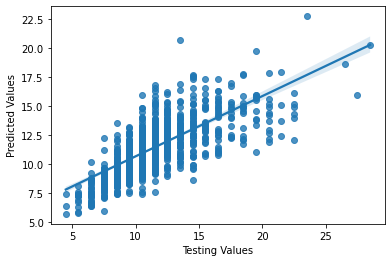

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(y_test, predictions)
plt.xlabel("Testing Values")
plt.ylabel("Predicted Values")

In [64]:
from sklearn.metrics import mean_squared_error,r2_score 
import numpy as np

In [65]:
Y = y_test.iloc[:].values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print("\n")
rmse = (np.sqrt(mean_squared_error(Y,predictions)))
r2 = r2_score(Y,predictions)
print("The model performance")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

Slope: [ -0.40525826  -2.63988775  16.31471846  10.2791093   13.22268688
 -23.44092204 -13.36530363]
Intercept: 4.977711139372348


The model performance
--------------------------------------
RMSE is 2.188304076326961
R2 score is 0.5389843985927831


